### python -m pip install pythonnet

In [49]:
from pathlib import Path
from enum import Enum
import json

In [50]:
data_folder = Path('./test_data/')
material_data = data_folder / 'material_data.json'
column_data = data_folder / 'column_data.json'
cross_section_data = data_folder / 'cross_section_data.json'
analytical_levels = data_folder / 'analytical_levels.json'


#start ETABS application.
myETABSObject.ApplicationStart()

#close the program.
ret = myETABSObject.ApplicationExit(False)


In [51]:
import clr
clr.AddReference("System.Runtime.InteropServices")
from System.Runtime.InteropServices import Marshal

#set the following path to the installed ETABS program directory
clr.AddReference(R'C:\Program Files\Computers and Structures\ETABS 22\ETABSv1.dll')
import ETABSv1 as etabs

#create API helper object
helper = etabs.cHelper(etabs.Helper())

try:
    myETABSObject = etabs.cOAPI(helper.GetObject("CSI.ETABS.API.ETABSObject"))
except:
    print("No running instance of the program found or failed to attach.")

#create SapModel object
SapModel = etabs.cSapModel(myETABSObject.SapModel)

N_mm_C = etabs.eUnits.N_mm_C
kN_m_C = etabs.eUnits.kN_m_C

display(myETABSObject)
display(SapModel)


In [52]:
ret = SapModel.SetPresentUnits(N_mm_C)
def get_concrete_material(SapModel, name:str):
    fc, IsLightweight, fcsfactor, SSType, SSHysType, StrainAtfc, StrainUltimate, FinalSlope, FrictionAngle, DilatationalAngle = 0,False,0,0,0,0,0,0,0,0
    ret = SapModel.PropMaterial.GetOConcrete_1(name, fc, IsLightweight, fcsfactor, SSType, SSHysType, StrainAtfc, StrainUltimate, FinalSlope, FrictionAngle, DilatationalAngle)
    return list(ret)
display(get_concrete_material(SapModel,'4000Psi'))
display(get_concrete_material(SapModel,'5000Psi'))
display(get_concrete_material(SapModel,'6000Psi'))
display(get_concrete_material(SapModel,'C30'))
display(get_concrete_material(SapModel,'C40'))
display(get_concrete_material(SapModel,'C50'))


def get_etabs_concrete_material(name:str):
    return {
        'Name':name,
        'Fc':float(name[2:]),
        'IsLightweight':False,
        'FcsFactor':0.0,
        'SSType':2,
        'SSHysType':4,
        'StrainAtFc':0.0022,
        'StrainUltimate':0.005,
        'FinalSlope':-0.1,
        'FrictionAngle': 0.0,
        'DilatationalAngle' : 0.0,
        'Temp' : 0.0
    }

#ret = SapModel.PropMaterial.SetOConcrete_1(*list(get_etabs_concrete_material('FC35').values()))
ret = SapModel.PropMaterial.SetOConcrete_1(**get_etabs_concrete_material('FC40'))
ret



[0, 27.57903155806312, False, 0.0, 2, 4, 0.00221914, 0.005, -0.1, 0.0, 0.0]

[1, 0.0, False, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]

[1, 0.0, False, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]

[1, 0.0, False, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]

[1, 0.0, False, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]

[1, 0.0, False, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]

0

In [46]:
def get_etabs_steel_material(name:str):
    if name.upper() == 'S235':
        fy,fu,efy,efu = 235.0, 360.0, 258.5, 396.0
    elif name.upper() == 'S275':
        fy,fu,efy,efu = 275.0, 430.0, 302.5, 473.0
    elif name.upper() == 'S355':
        fy,fu,efy,efu = 355.0, 510.0, 390.5, 561.0
    elif name.upper() == 'S450':
        fy,fu,efy,efu = 440.0, 550.0, 484.0, 605.0
    elif name.upper() == 'A992FY50':
        fy,fu,efy,efu = 344.738, 448.159, 379.212, 492.975
    elif name.upper() == 'A572GR50':
        fy,fu,efy,efu = 344.738, 448.159, 379.212, 492.975
    elif name.upper() == 'A913GR50':
        fy,fu,efy,efu = 344.738, 413.685, 379.212, 455.054
    else:
        fy,fu,efy,efu = 248.211, 399.896, 372.317, 439.885

    return {
    'Name' : name,
    'Fy' : fy,
    'Fu' : fu,
    'EFy' : efy,
    'EFu' : efu,
    'SSType' : 1,
    'SSHysType' : 1,
    'StrainAtHardening' : 0.015,
    'StrainAtMaxStress' : 0.11,
    'StrainAtRupture' : 0.17,
    'FinalSlope' : -0.1,
    'Temp' : 0
    }

ret = SapModel.PropMaterial.SetOSteel_1(**get_etabs_steel_material('A913GR50'))
ret


1

In [47]:
ret = SapModel.SetPresentUnits(N_mm_C)
def get_steel_material(SapModel, name:str):
    Fy, Fu, eFy, eFu, SSType, SSHysType, StrainAtHardening, StrainAtMaxStress, StrainAtRupture, FinalSlope = 0,0,0,0,0,0,0,0,0,0
    ret = SapModel.PropMaterial.GetOSteel_1(name, Fy, Fu, eFy, eFu, SSType, SSHysType, StrainAtHardening, StrainAtMaxStress, StrainAtRupture, FinalSlope)
    return list(ret)
display(get_steel_material(SapModel, 'A913Gr50'))
display(get_steel_material(SapModel, 'A992Fy50'))
display(get_steel_material(SapModel, 'A572Gr50'))
display(get_steel_material(SapModel, 'S235'))
display(get_steel_material(SapModel, 'S275'))
display(get_steel_material(SapModel, 'S355'))
display(get_steel_material(SapModel, 'S450'))


[1, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0]

[0,
 344.737894475789,
 448.15926281852575,
 379.2116839233679,
 492.9751891003783,
 1,
 1,
 0.015,
 0.11,
 0.17,
 -0.1]

[1, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0]

[1, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0]

[0, 275.0, 430.0, 302.5, 473.0, 1, 1, 0.015, 0.11, 0.17, -0.1]

[0, 355.0, 510.0, 390.5, 561.0, 1, 1, 0.015, 0.11, 0.17, -0.1]

[1, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0]

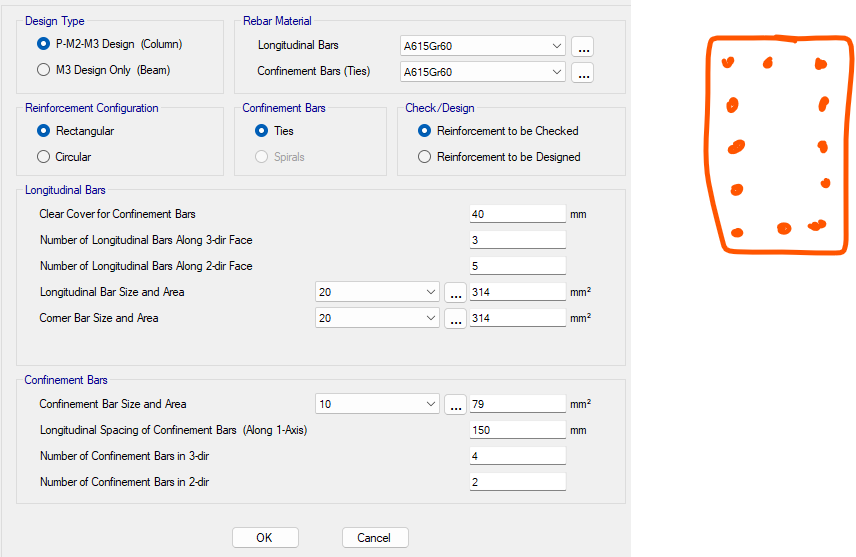

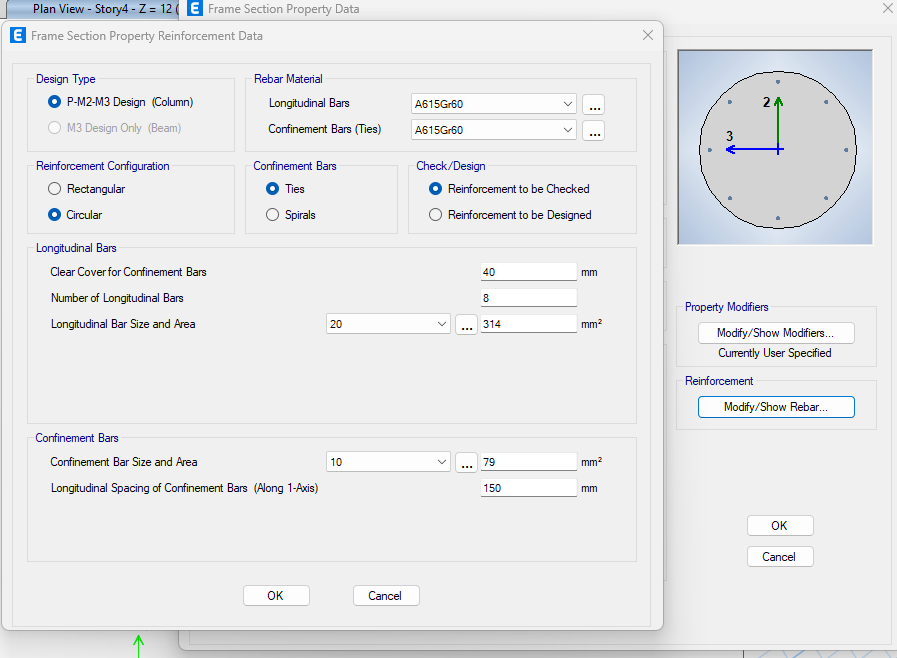

In [ ]:
name, MatPropLong, MatPropConfine, Pattern, ConfineType, Cover, NumberCBars, NumberR3Bars, NumberR2Bars, RebarSize, TieSize, TieSpacingLongit, Number2DirTieBars, Number3DirTieBars, ToBeDesigned = '0-C 500x900-16T20', '', '', 0, 0, 0, 0, 0, 0, '', '', 0, 0, 0, False
# get column rebar data
ret = SapModel.PropFrame.GetRebarColumn(name, MatPropLong, MatPropConfine, Pattern, ConfineType, Cover, NumberCBars, NumberR3Bars, NumberR2Bars, RebarSize, TieSize, TieSpacingLongit, Number2DirTieBars, Number3DirTieBars, ToBeDesigned)
list(ret)

name, MatPropLong, MatPropConfine, Pattern, ConfineType, Cover, NumberCBars, NumberR3Bars, NumberR2Bars, RebarSize, TieSize, TieSpacingLongit, Number2DirTieBars, Number3DirTieBars, ToBeDesigned = '1-C 900-24T20', '', '', 0, 0, 0, 0, 0, 0, '', '', 0, 0, 0, False
# get column rebar data
ret = SapModel.PropFrame.GetRebarColumn(name, MatPropLong, MatPropConfine, Pattern, ConfineType, Cover, NumberCBars, NumberR3Bars, NumberR2Bars, RebarSize, TieSize, TieSpacingLongit, Number2DirTieBars, Number3DirTieBars, ToBeDesigned)
list(ret)

In [48]:
SapModel = None
myETABSObject = None